# Data Exploration and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            23622 non-null  object 
 1   holiday              31 non-null     object 
 2   weather_main         23622 non-null  object 
 3   weather_description  23622 non-null  object 
 4   rain_1h              23622 non-null  float64
 5   snow_1h              23622 non-null  float64
 6   clouds_all           23622 non-null  int64  
 7   temp                 23622 non-null  float64
 8   traffic_volume       23622 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [3]:
df.isna().sum()

date_time                  0
holiday                23591
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
dtype: int64

Only the "holiday" variable has mising values so an analysis needs to be perform to infer in which circumstances these happen.

In [4]:
df.describe()

,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


From the previous report we conclude that the variable "snow_1h" only has one possible value: 0.0. This lack of variance sugests that it may not present predictive value when performing forecasts. Consequently, it may be removed from the data set.

In [5]:
df.describe(exclude=[np.number])

,date_time,holiday,weather_main,weather_description
count,23622,31,23622,23622
unique,19608,11,11,37
top,2018-08-24 07:00:00,Labor Day,Clear,sky is clear
freq,5,5,7027,6268


From the previous table, we see that not all values of "date_time" are unique, indicating there is more than one entry at the same day and hour in several occasions. We need to analyze why these happens.

It is important to remember that the time interval of the data set is from July 2016 to September 2018, so not all holidays have the same frequency. Still, an analysis of these variable needs to be done, since the total values count is only 31. This number should be much higher, since all the 24 data entries for the day the holiday takes place, should be have the holiday value present, which seems to not be happening.

The "weather_main" and "weather_description" seem to be coherent to their definition, not having any missing values.

In [6]:
# Get all the possible values of the 'holiday' column
print(df['holiday'].value_counts())

holiday
Labor Day                    5
Martin Luther King Jr Day    5
Independence Day             3
State Fair                   3
Christmas Day                3
Veterans Day                 2
Columbus Day                 2
Thanksgiving Day             2
New Years Day                2
Washingtons Birthday         2
Memorial Day                 2
Name: count, dtype: int64


By obtaining the possible values of the "holiday" column and their frequency, we see which are the considered holidays and what their distribution is. We will take the "Labor Day" as an example and explore it.

In [7]:
df[df['holiday'] == 'Labor Day']

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
12300,2017-09-04 00:00:00,Labor Day,Clear,sky is clear,0.00,0.0,1,295.54,1026
22748,2018-09-03 00:00:00,Labor Day,Rain,light rain,0.25,0.0,1,292.43,962
22749,2018-09-03 00:00:00,Labor Day,Mist,mist,0.25,0.0,1,292.43,962


As we have remarked previously, there is more than one record for the same "date_time". In this case, the only differences between both records are present in the "weather_main" and "weather_description" columns. This may suggest that different sensors registered or classified the weather conditions differently at the same time.

Taking the day "2016-09-05" as an example, which is the first "Labor Day" recorded in the data set, we will check how the data was recorded in that day

In [8]:
# Get all entries when date_time has '2016-09-05' present in it
print("Size:", df[df['date_time'].str.contains('2016-09-05')].shape)
df[df['date_time'].str.contains('2016-09-05')]

Size: (40, 9)


,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
1739,2016-09-05 01:00:00,NaN,Rain,moderate rain,1.40,0.0,40,292.22,537
1740,2016-09-05 01:00:00,NaN,Thunderstorm,proximity thunderstorm,1.40,0.0,40,292.22,537
1741,2016-09-05 02:00:00,NaN,Rain,light rain,0.25,0.0,1,292.39,369
1742,2016-09-05 02:00:00,NaN,Thunderstorm,proximity thunderstorm,0.25,0.0,1,292.39,369
1743,2016-09-05 03:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,0.00,0.0,1,292.94,250
1744,2016-09-05 03:00:00,NaN,Rain,light rain,0.00,0.0,1,292.94,250
1745,2016-09-05 04:00:00,NaN,Rain,heavy intensity rain,10.16,0.0,90,292.15,278
1746,2016-09-05 04:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,10.16,0.0,90,292.15,278


With the previous information, we conclude that most hours have more than one record.

We see that only the midnight record has a "holiday" value.

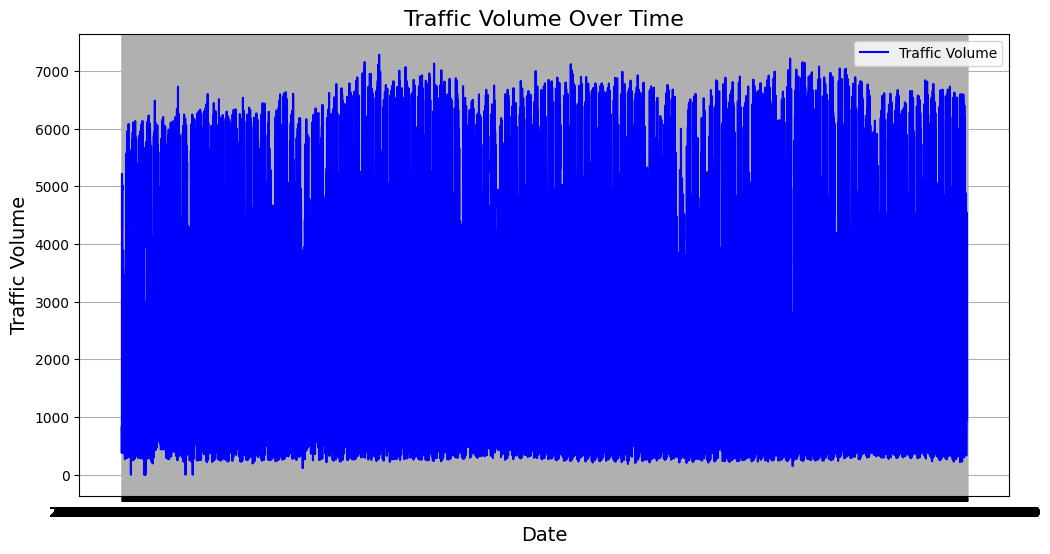

In [9]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date_time'], df['traffic_volume'], label='Traffic Volume', color='blue')
plt.title('Traffic Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Data Pre-Processing

In [10]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
# Convert date_time to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])
# Get all the possible values of the 'holiday' column
df['holiday'].value_counts(dropna=False)
df.drop(columns=['snow_1h'], inplace=True)

We have an issue where only the first hour of the day on the holidays has the column holiday filled. We need to fill the rest of the day with the same value.

In [11]:
# Create a date column for easier grouping
df['date'] = df['date_time'].dt.date

# For each date with a holiday, propagate that holiday value to all rows of that date
holiday_dates = df[df['holiday'].notna()][['date', 'holiday']].drop_duplicates()
holiday_dict = dict(zip(holiday_dates['date'], holiday_dates['holiday']))

# Fill in the holiday values
df['holiday'] = df['date'].map(holiday_dict)

# Remove the temporary date column if you don't need it
df = df.drop('date', axis=1)

df['holiday'].value_counts(dropna=False)


holiday
NaN                          22877
Labor Day                      111
Martin Luther King Jr Day       84
Independence Day                78
State Fair                      72
Thanksgiving Day                66
New Years Day                   66
Washingtons Birthday            65
Christmas Day                   54
Memorial Day                    54
Veterans Day                    48
Columbus Day                    47
Name: count, dtype: int64

We have certain days where we have less than 24 rows meaning there are days without all values
In this case we should generate rows to fill those hours based on the average value for the same hour in the previous week value and the next week value.
The rain_1h and clouds_all should have the average value of the row before and after the missing row.
The weather_main and weather_description should be the values from the previous row.

In [12]:
# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates(subset=["date_time"], keep="first")

# First ensure date_time is our index
df = df.set_index("date_time").sort_index()

# Create a complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="h")

# Identify missing timestamps
missing_timestamps = date_range.difference(df.index)

print(f"Number of missing timestamps: {len(missing_timestamps)}")

# Create DataFrame for missing timestamps
missing_df = pd.DataFrame(index=missing_timestamps, columns=df.columns)

# For each missing timestamp, calculate values
for timestamp in missing_timestamps:
    # Get same hour from previous and next week
    prev_week = timestamp - pd.Timedelta(weeks=1)
    next_week = timestamp + pd.Timedelta(weeks=1)

    # Get values for same hour from prev and next week if they exist
    prev_week_value = df[df.index == prev_week]["traffic_volume"].values
    next_week_value = df[df.index == next_week]["traffic_volume"].values

    # Calculate average traffic volume
    values_to_average = []
    if len(prev_week_value) > 0:
        values_to_average.append(prev_week_value[0])
    if len(next_week_value) > 0:
        values_to_average.append(next_week_value[0])

    if values_to_average:
        avg_traffic = np.mean(values_to_average)
    else:
        # If no values available, use the mean traffic for that hour across all days
        hour = timestamp.hour
        avg_traffic = df[df.index.hour == hour]["traffic_volume"].mean()

    # Fill in traffic and temperature
    missing_df.loc[timestamp, "traffic_volume"] = int(avg_traffic)
    missing_df.loc[timestamp, "temp"] = df["temp"].mean()

    # Get the rows immediately before and after the missing timestamp
    prev_row = (
        df[df.index < timestamp].iloc[-1] if len(df[df.index < timestamp]) > 0 else None
    )
    next_row = (
        df[df.index > timestamp].iloc[0] if len(df[df.index > timestamp]) > 0 else None
    )

    # Calculate average of rain_1h and clouds_all from adjacent rows
    if prev_row is not None and next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = (
            prev_row["rain_1h"] + next_row["rain_1h"]
        ) / 2
        missing_df.loc[timestamp, "clouds_all"] = int(
            (prev_row["clouds_all"] + next_row["clouds_all"]) / 2
        )
    elif prev_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = prev_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = prev_row["clouds_all"]
    elif next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = next_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = next_row["clouds_all"]
    else:
        missing_df.loc[timestamp, "rain_1h"] = 0
        missing_df.loc[timestamp, "clouds_all"] = int(df["clouds_all"].mean())

    # Use weather values from previous row
    if prev_row is not None:
        missing_df.loc[timestamp, "weather_main"] = prev_row["weather_main"]
        missing_df.loc[timestamp, "weather_description"] = prev_row[
            "weather_description"
        ]
    else:
        missing_df.loc[timestamp, "weather_main"] = (
            next_row["weather_main"]
            if next_row is not None
            else df["weather_main"].mode()[0]
        )
        missing_df.loc[timestamp, "weather_description"] = (
            next_row["weather_description"]
            if next_row is not None
            else df["weather_description"].mode()[0]
        )

    # Fill holiday based on the date
    date = timestamp.date()
    if date in holiday_dict:
        missing_df.loc[timestamp, "holiday"] = holiday_dict[date]
    else:
        missing_df.loc[timestamp, "holiday"] = None

# Combine original and missing data
df_complete = pd.concat([df, missing_df])
df_complete = df_complete.sort_index()

# Verify we now have 24 hours for each day
days_hours = df_complete.groupby(df_complete.index.date).size()
print("\nNumber of hours per day after filling:")
print(days_hours.value_counts())

Number of missing timestamps: 120

Number of hours per day after filling:
24    822
Name: count, dtype: int64


In [13]:
# create a column that indicates the day of the week
df_complete['day_of_week'] = df_complete.index.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
df_complete

,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume,day_of_week
2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,1,289.04,825,Friday
2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,1,288.16,531,Friday
2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,1,286.64,381,Friday
2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,1,285.39,406,Friday
2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,1,284.67,790,Friday
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,75,283.45,3543,Sunday
2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,90,282.76,2781,Sunday
2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,90,282.73,2159,Sunday
2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,90,282.09,1450,Sunday


In [14]:
# Fill missing holiday values with 'no_holiday'
df_complete['holiday'] = df_complete['holiday'].fillna('no_holiday')
df_complete['holiday'].value_counts()

holiday
no_holiday                   19128
Independence Day                72
State Fair                      72
Labor Day                       72
Columbus Day                    48
Veterans Day                    48
Thanksgiving Day                48
Christmas Day                   48
New Years Day                   48
Martin Luther King Jr Day       48
Washingtons Birthday            48
Memorial Day                    48
Name: count, dtype: int64

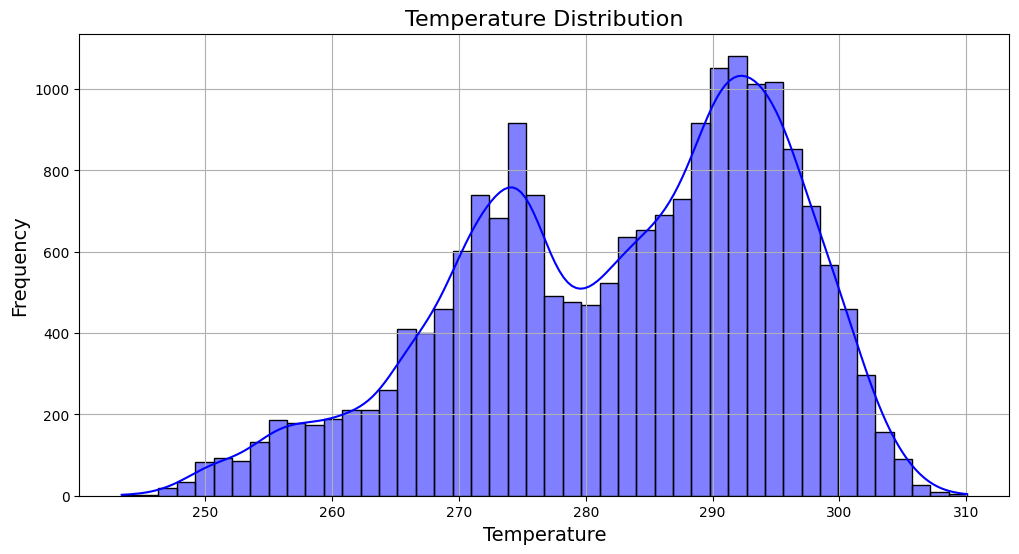

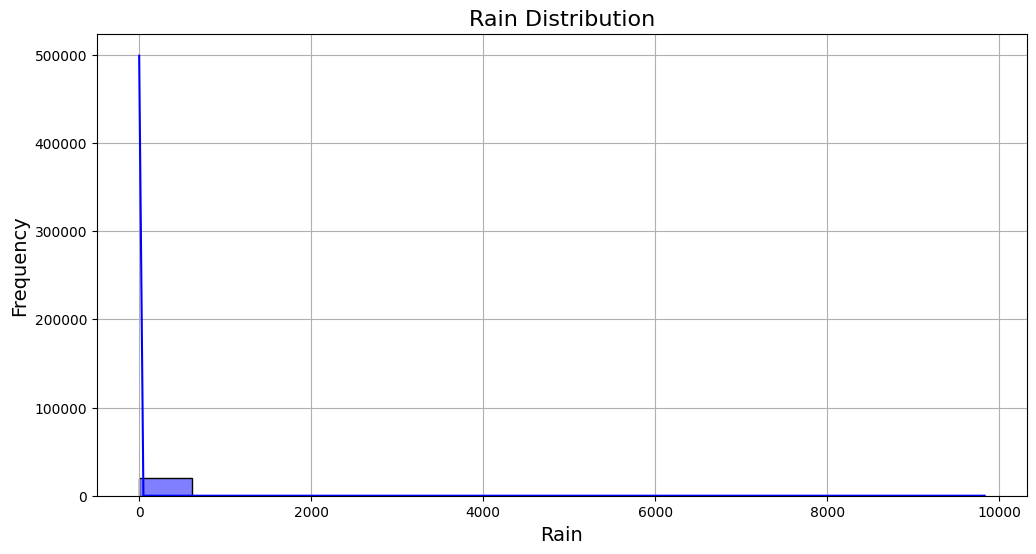

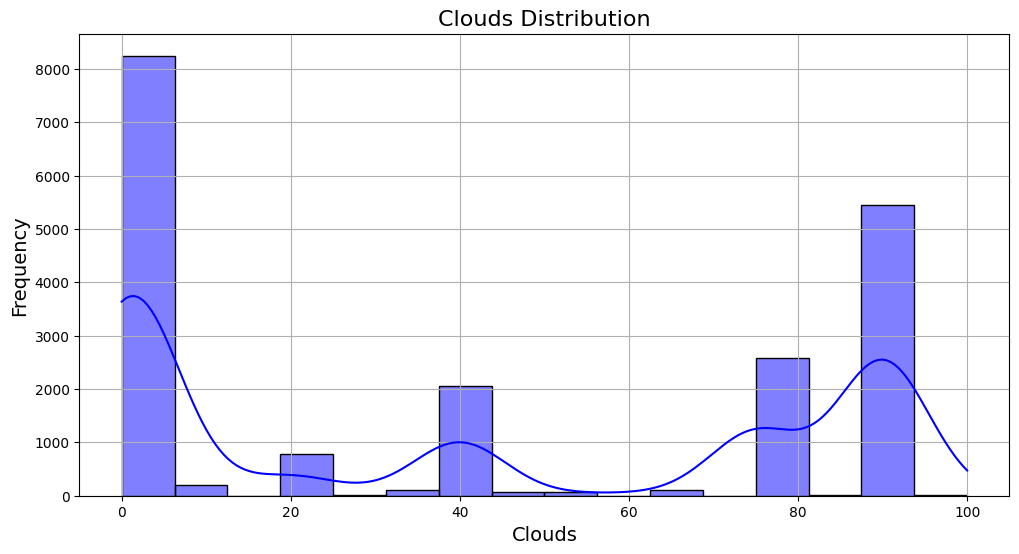

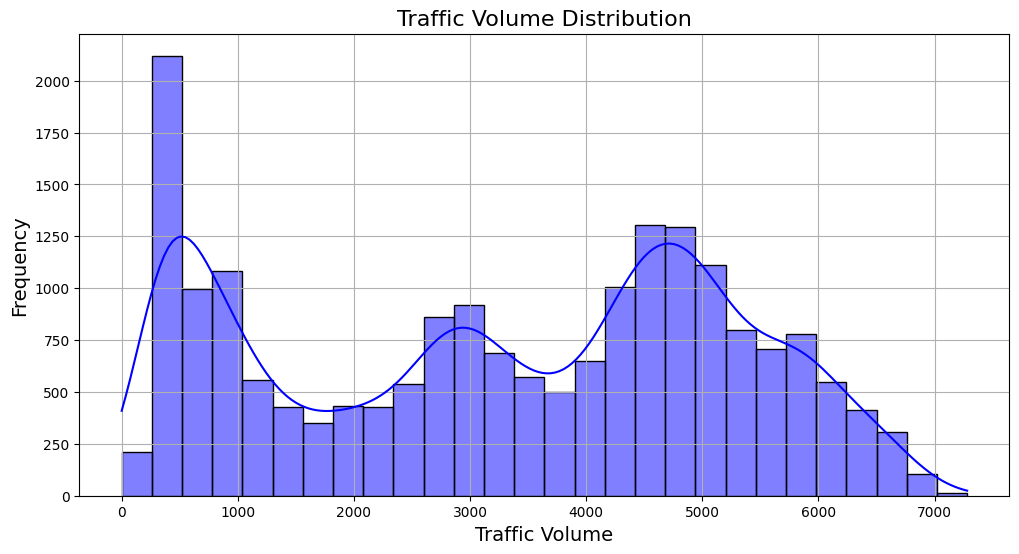

In [15]:
# Plot the distribution of each numerical feature
plt.figure(figsize=(12, 6))
sns.histplot(df_complete['temp'], kde=True, color='blue')
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['rain_1h'], kde=True, color='blue')
plt.title('Rain Distribution', fontsize=16)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['clouds_all'], kde=True, color='blue')
plt.title('Clouds Distribution', fontsize=16)
plt.xlabel('Clouds', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['traffic_volume'], kde=True, color='blue')
plt.title('Traffic Volume Distribution', fontsize=16)
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

<Axes: xlabel='holiday', ylabel='traffic_volume'>

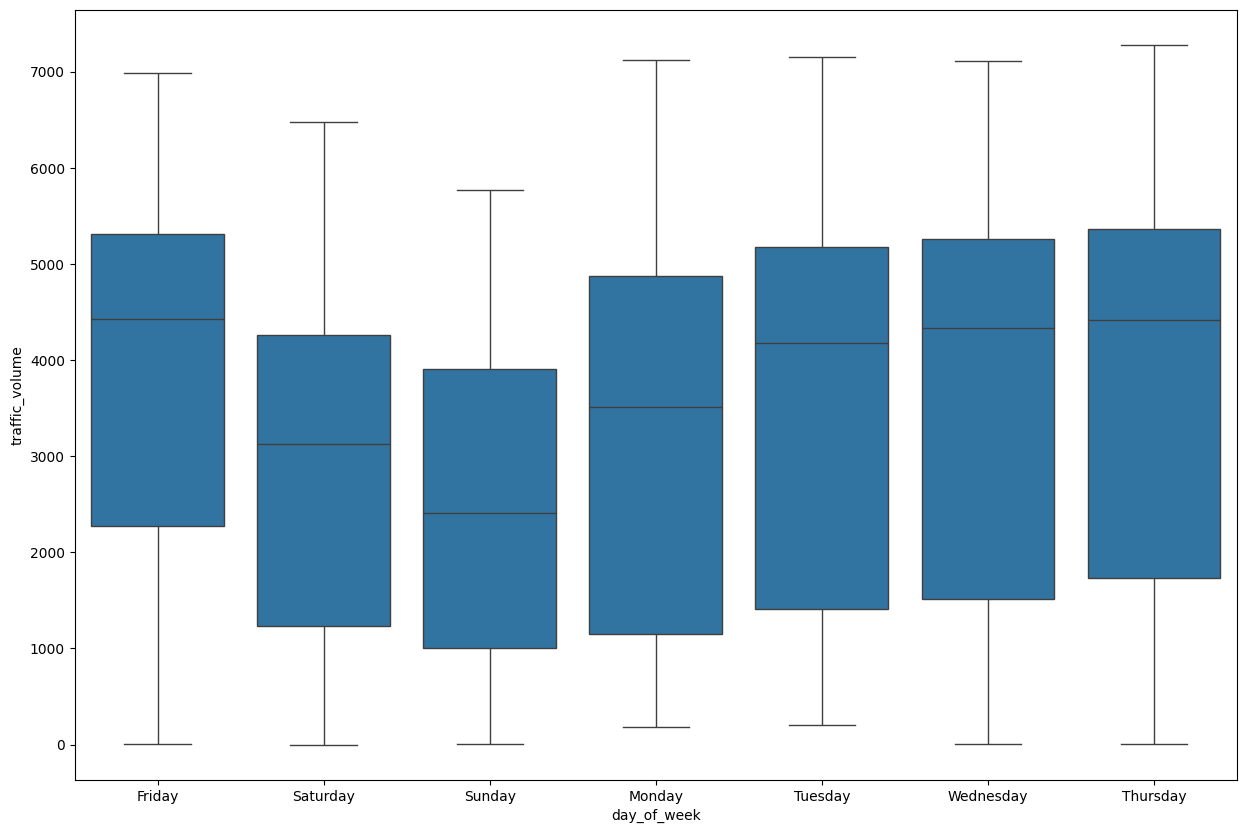

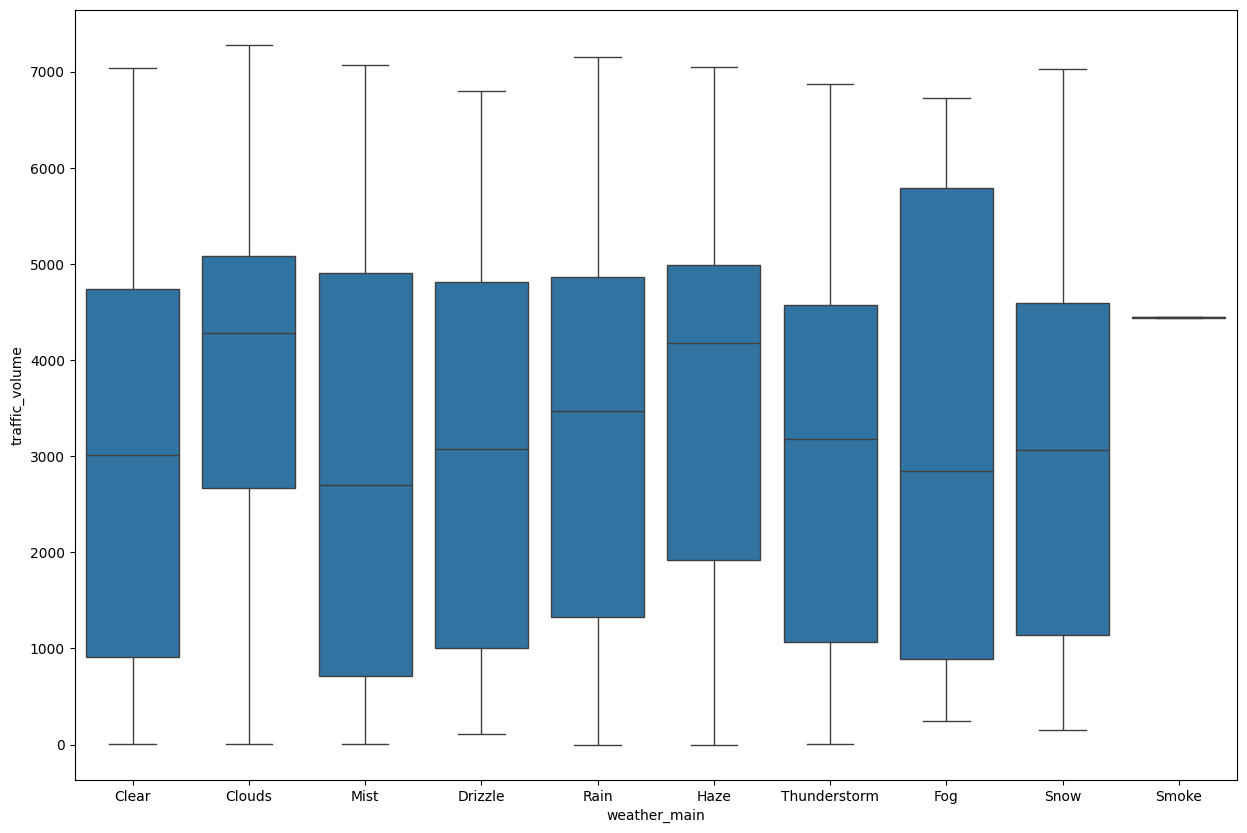

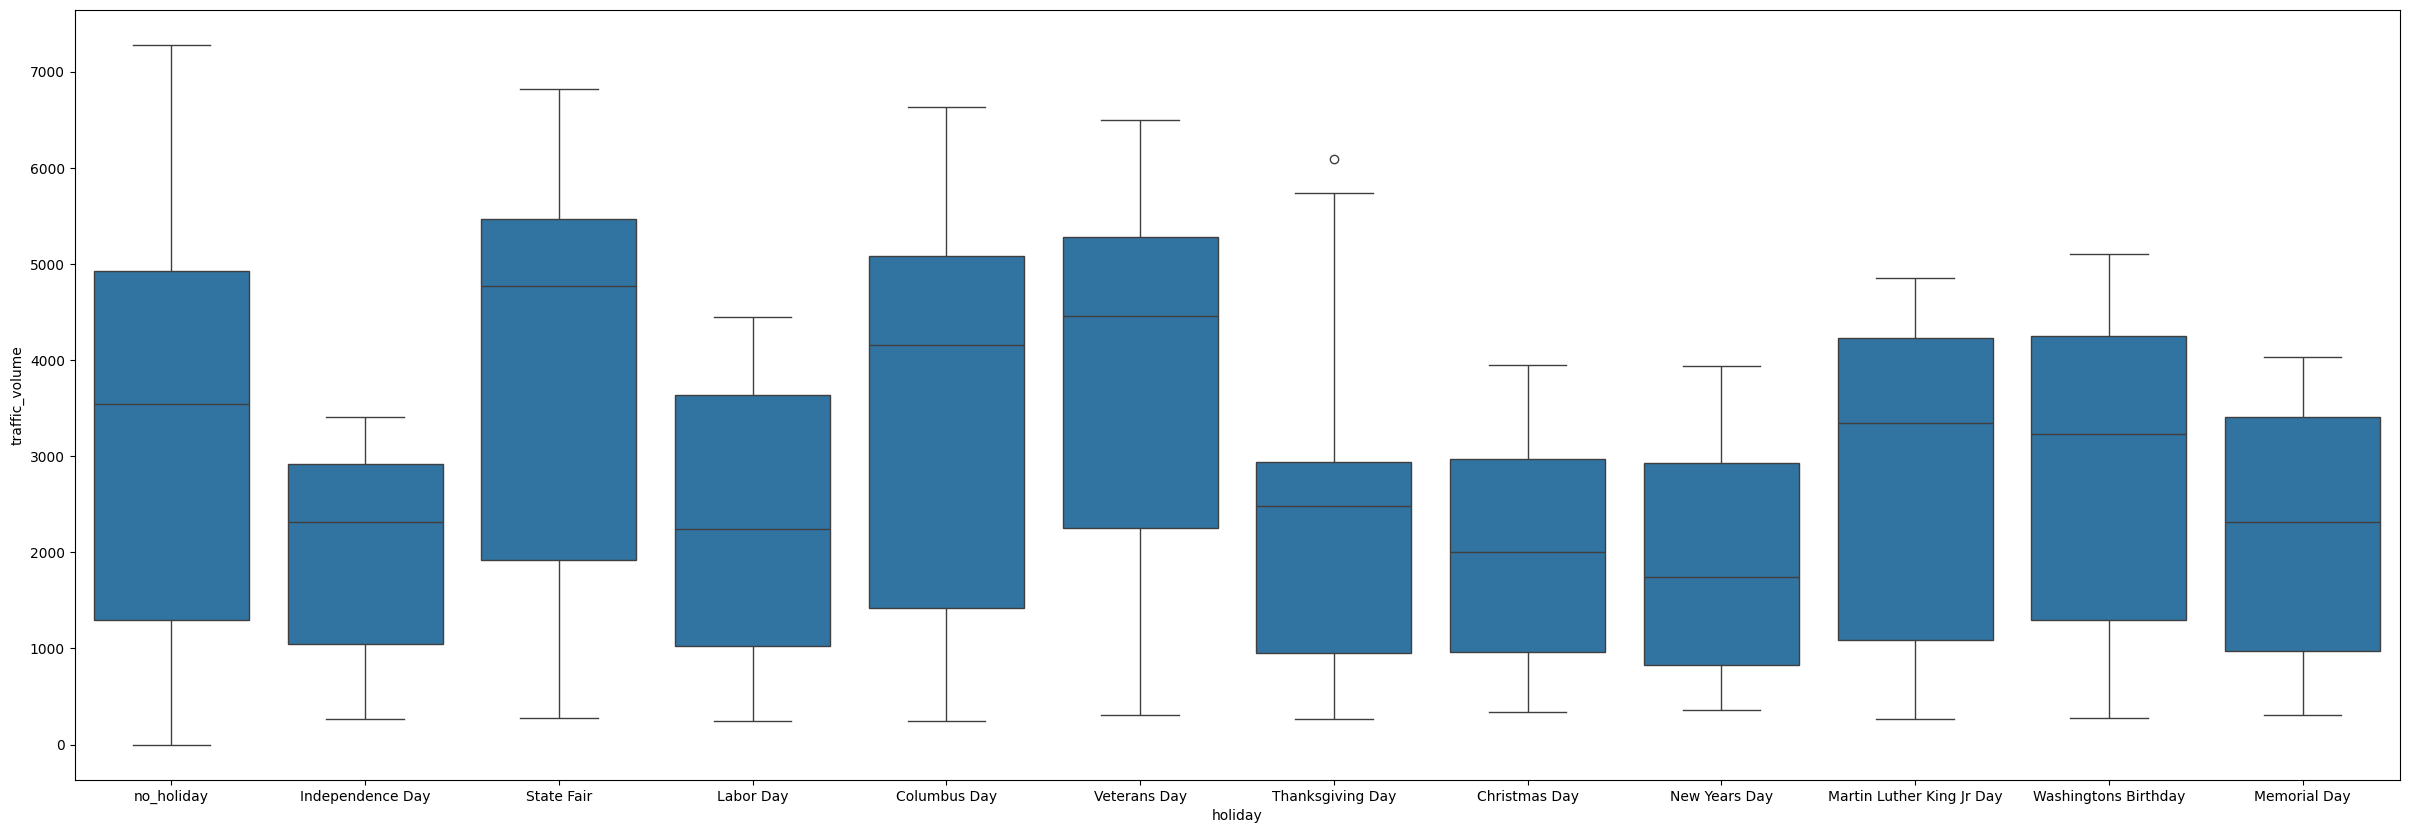

In [16]:
# Plot the distribution of traffic volume by day of the week
plt.figure(figsize=(15, 10))
sns.boxplot(x='day_of_week', y='traffic_volume', data=df_complete)

# Plot the distribution of traffic volume by weather_main
plt.figure(figsize=(15, 10))
sns.boxplot(x='weather_main', y='traffic_volume', data=df_complete)

# Plot the distribution of traffic volume by holiday
plt.figure(figsize=(30, 10))
sns.boxplot(x='holiday', y='traffic_volume', data=df_complete)

<Axes: >

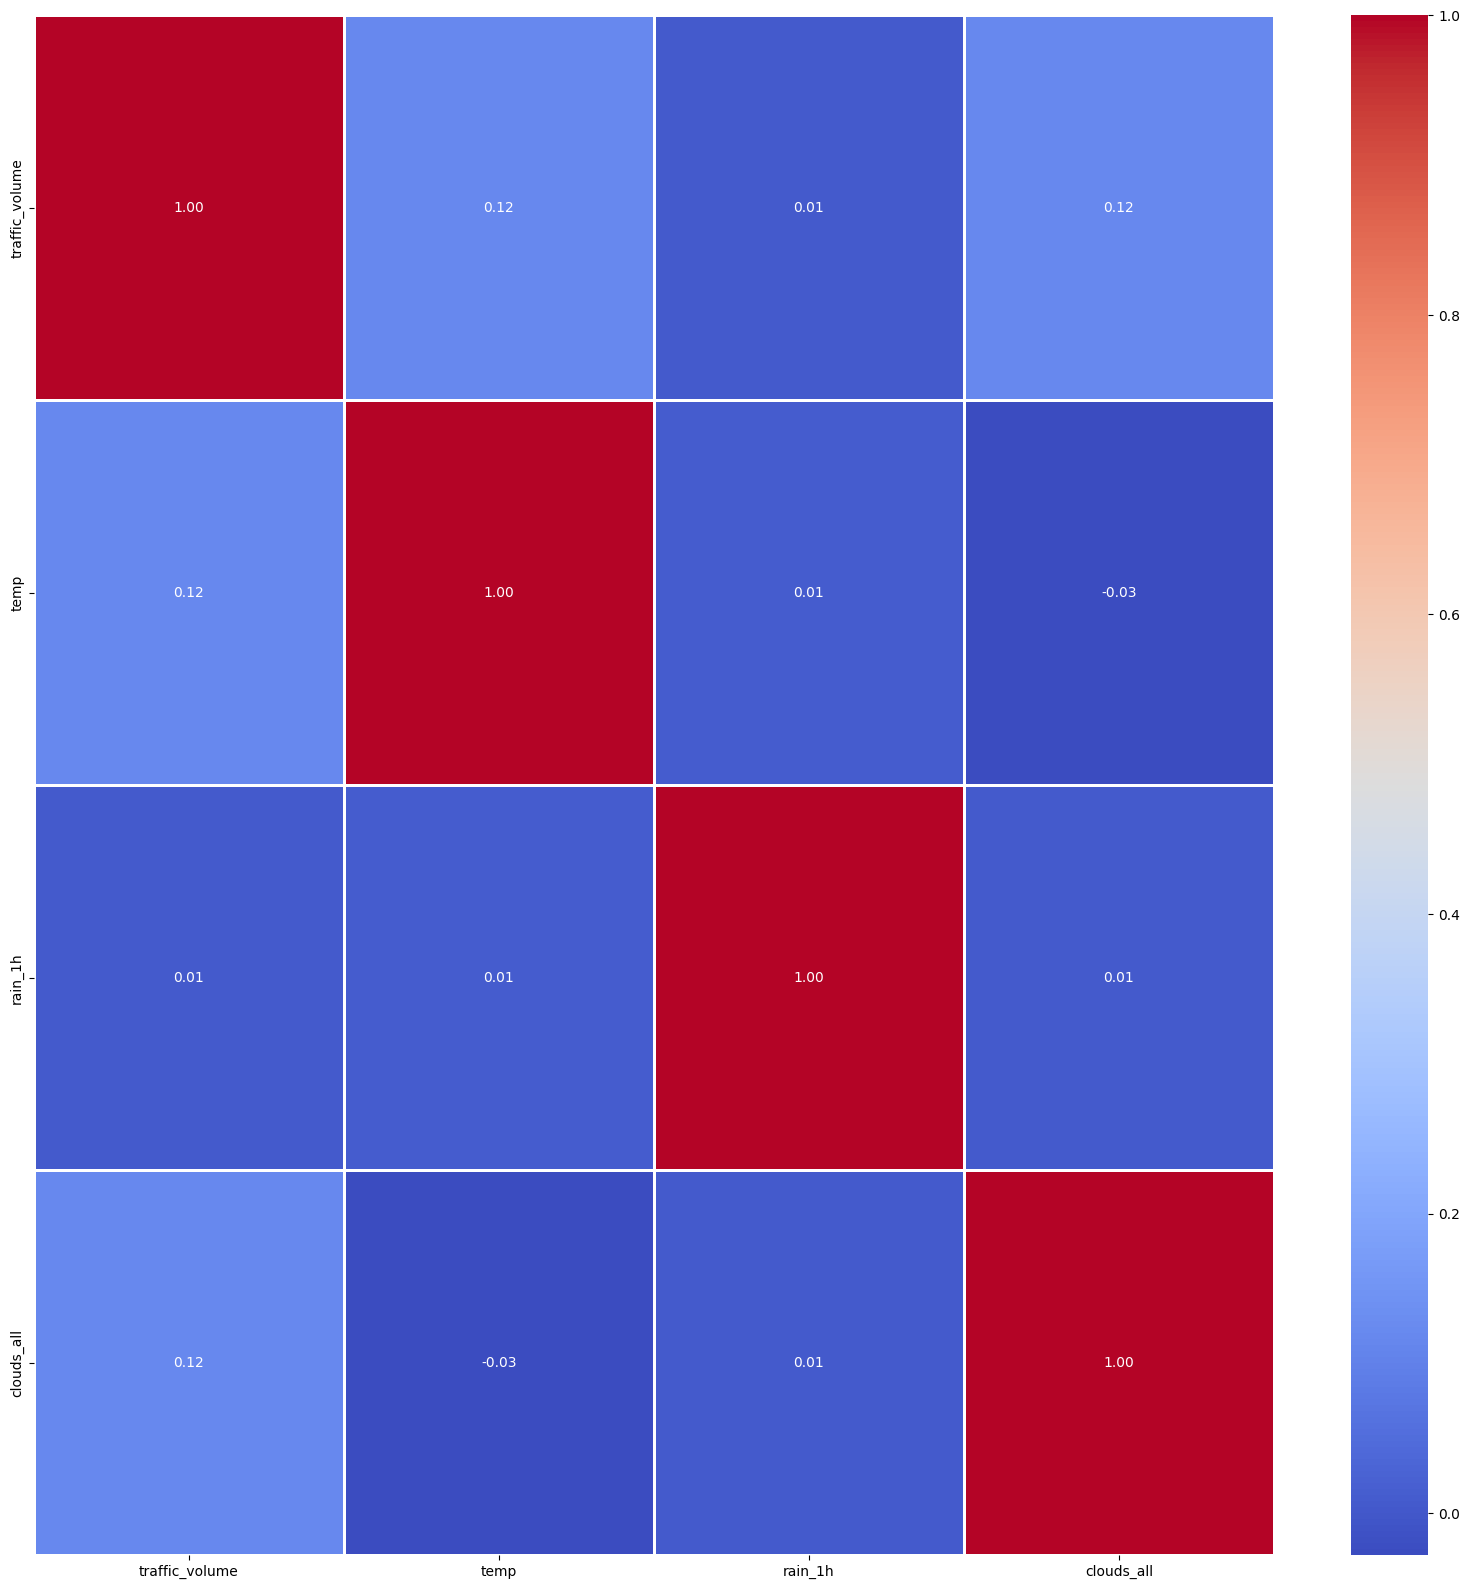

In [17]:
# Obtain the correlation matrix of numerical columns
plt.figure(figsize=(20, 20))
sns.heatmap(df_complete[['traffic_volume', 'temp', 'rain_1h', 'clouds_all']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

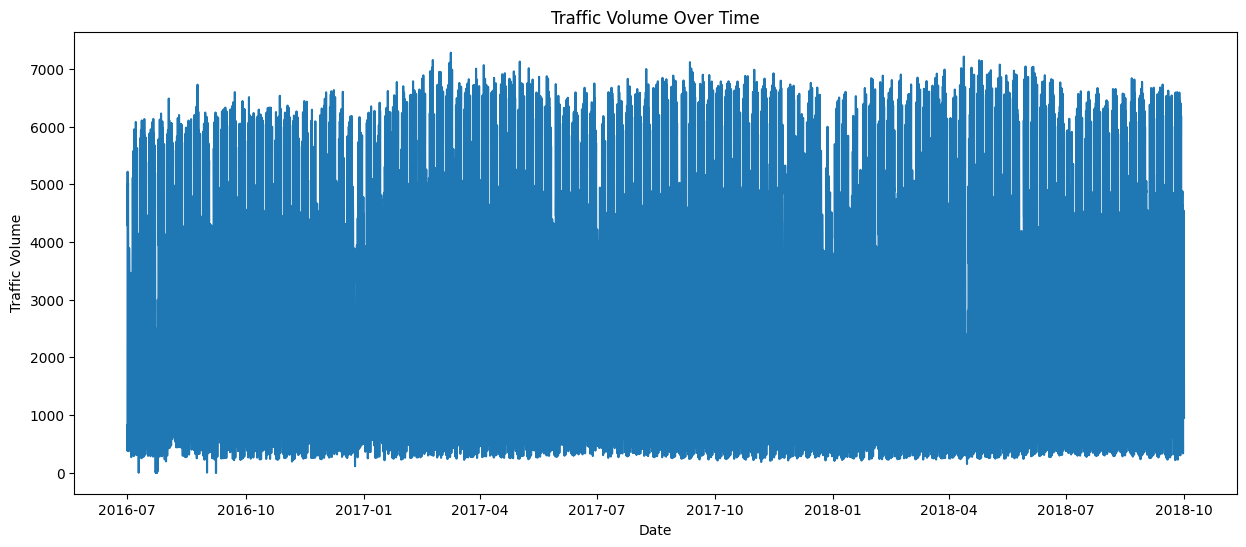

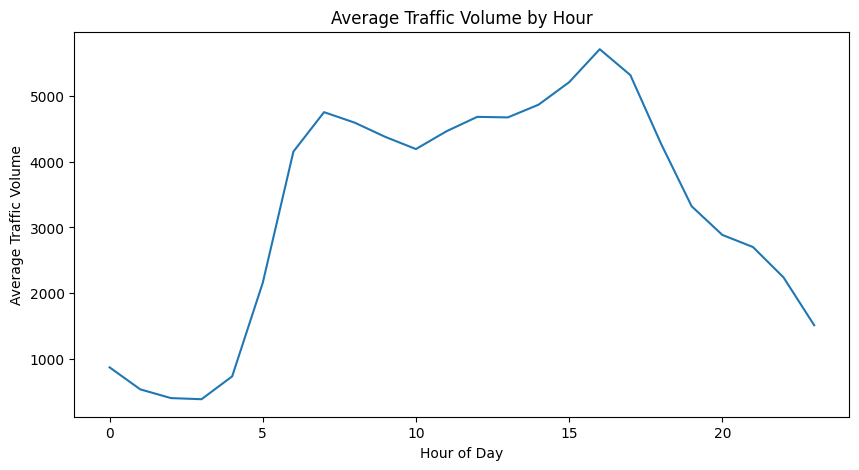

In [18]:
# Let's first create a basic time series plot to understand the patterns
plt.figure(figsize=(15, 6))
plt.plot(df_complete.index, df_complete['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

# Let's also look at the average daily pattern
daily_pattern = df_complete.groupby(df_complete.index.hour)['traffic_volume'].mean()
plt.figure(figsize=(10, 5))
plt.plot(daily_pattern.index, daily_pattern.values)
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

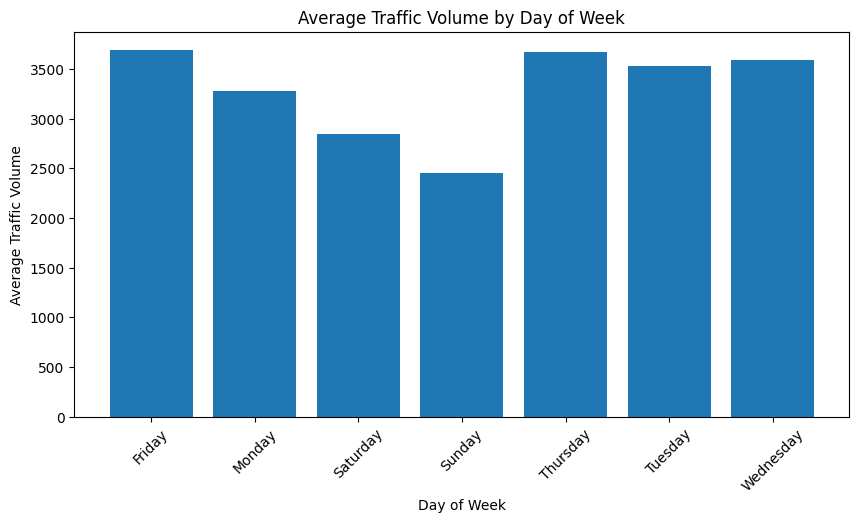

/tmp/ipykernel_54651/1236392187.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_series = df_complete['traffic_volume'].resample('H').mean()


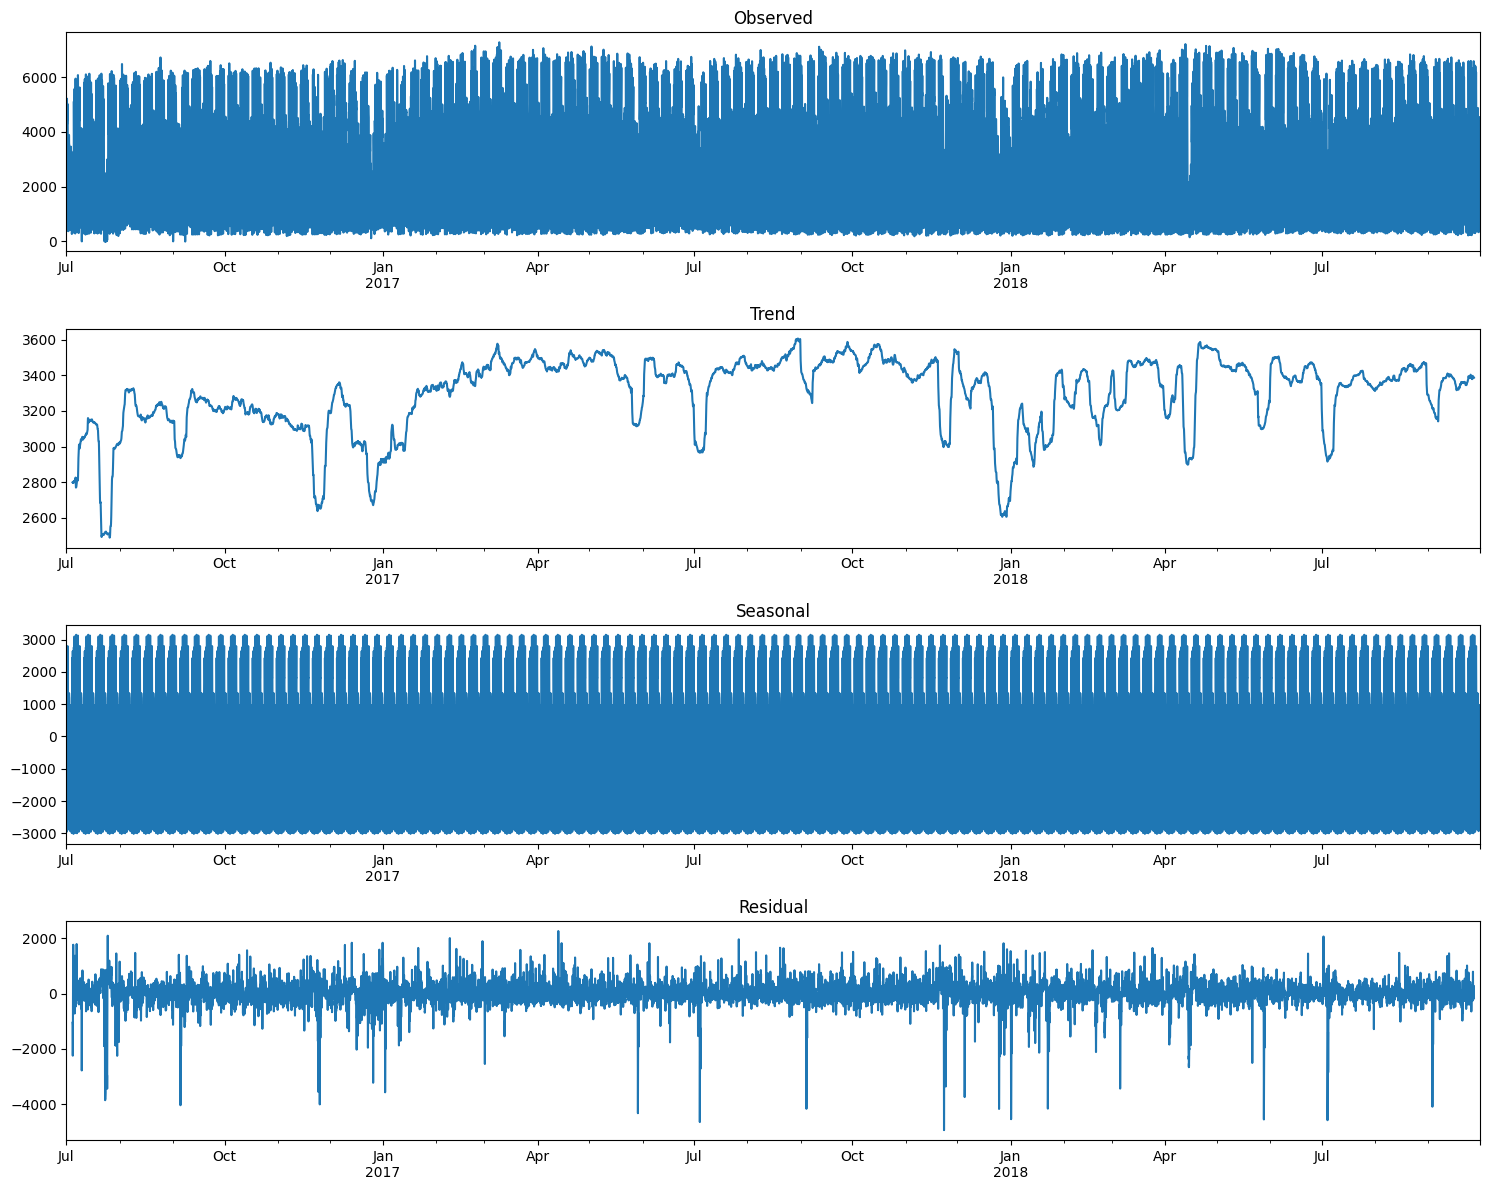

In [19]:
# And weekly pattern
weekly_pattern = df_complete.groupby('day_of_week')['traffic_volume'].mean()
plt.figure(figsize=(10, 5))
plt.bar(weekly_pattern.index, weekly_pattern.values)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

# Let's also perform decomposition to see trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to hourly frequency to ensure regularity
traffic_series = df_complete['traffic_volume'].resample('H').mean()

# Perform decomposition
decomposition = seasonal_decompose(traffic_series, period=24*7)  # 7 days * 24 hours

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# Statistical Analysis

In [20]:
# First, let's take a subset of the data as mentioned in the requirements
# We'll use 3 months of data to keep it manageable for statistical models
df_subset = df_complete['2018-07-01':'2018-12-31'].copy()

# Convert all numeric columns to the correct type
df_subset['traffic_volume'] = pd.to_numeric(df_subset['traffic_volume'])
df_subset['rain_1h'] = pd.to_numeric(df_subset['rain_1h'])
df_subset['clouds_all'] = pd.to_numeric(df_subset['clouds_all'])
df_subset['temp'] = pd.to_numeric(df_subset['temp'])


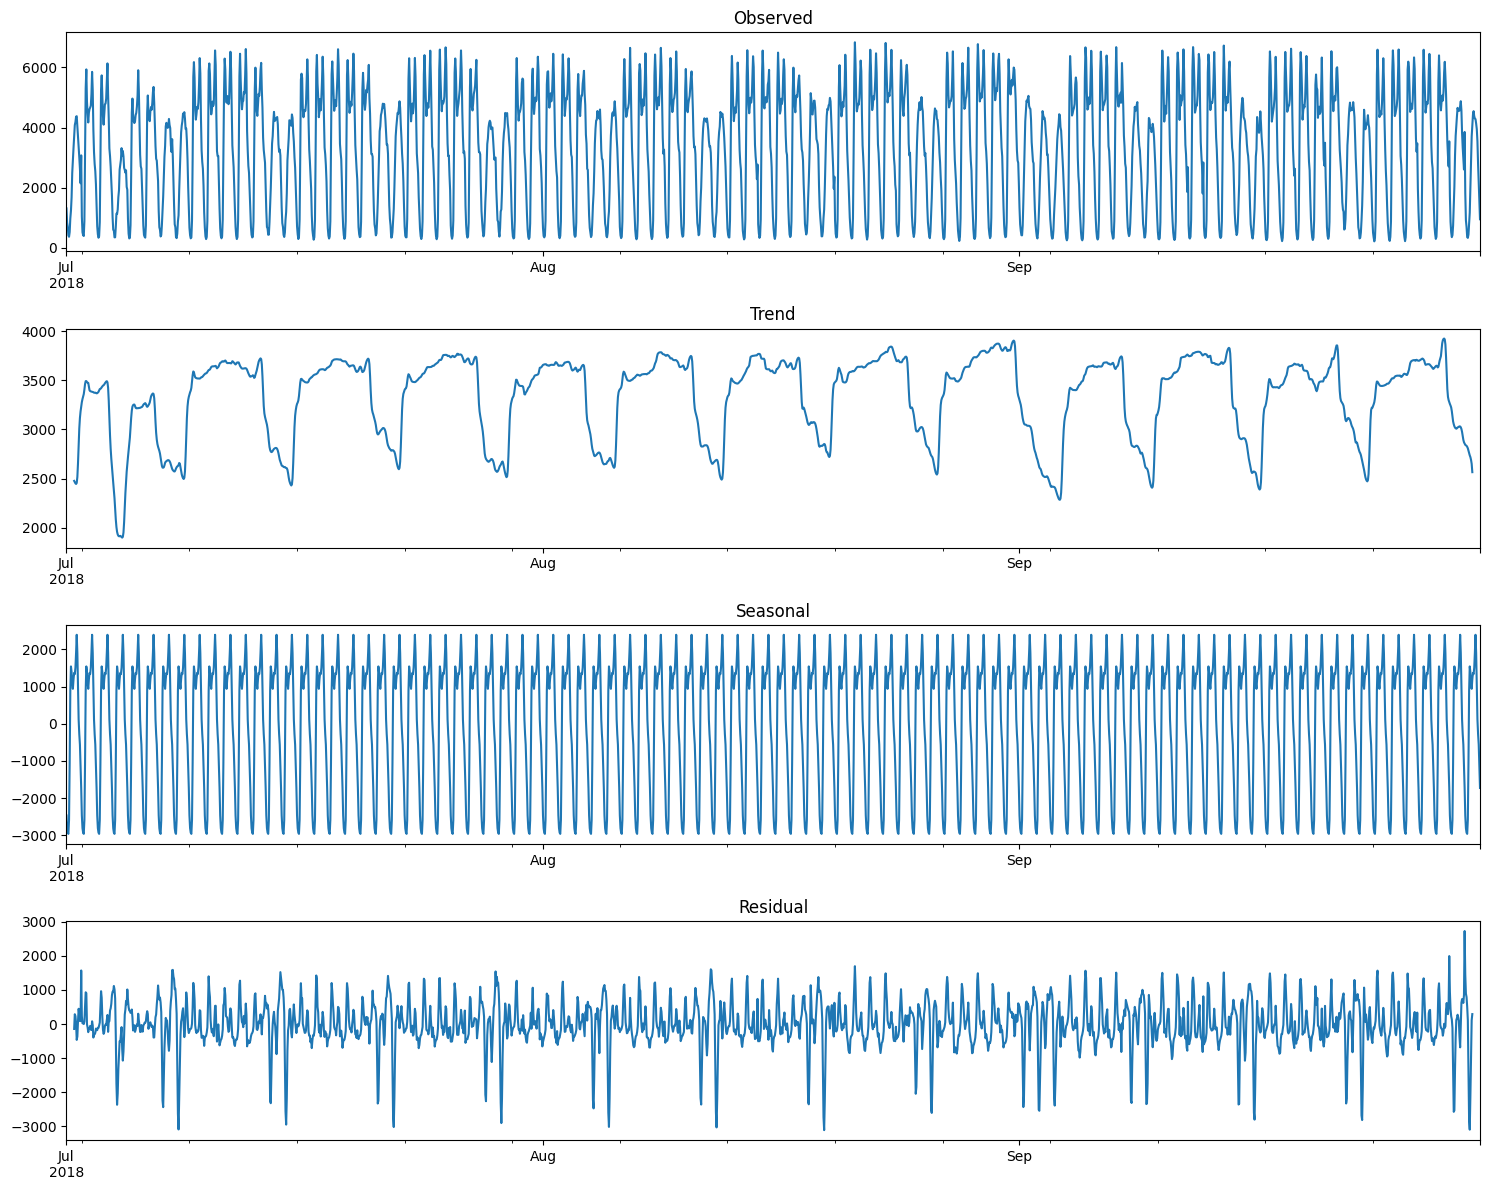

ADF Statistic: -5.655382799095882
p-value: 9.6477243879521e-07
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [21]:
# 1. First, let's examine the time series components
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_subset['traffic_volume'], period=24)  # 24 hours for daily seasonality

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# 2. Check for stationarity
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df_subset['traffic_volume'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Training data dtype: int64
Exogenous features dtypes:
rain_1h                 float64
clouds_all              float64
is_weekend              float64
hour                    float64
day_of_week             float64
weather_Clear           float64
weather_Clouds          float64
weather_Drizzle         float64
weather_Fog             float64
weather_Haze            float64
weather_Mist            float64
weather_Rain            float64
weather_Smoke           float64
weather_Thunderstorm    float64
dtype: object
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81556D+00    |proj g|=  2.58466D-01


/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.76322D+00    |proj g|=  1.58901D-01

At iterate   10    f=  7.73875D+00    |proj g|=  2.11792D-01

At iterate   15    f=  7.73408D+00    |proj g|=  1.31494D-02

At iterate   20    f=  7.69844D+00    |proj g|=  2.10008D-01

At iterate   25    f=  7.66577D+00    |proj g|=  1.66327D-01

At iterate   30    f=  7.66537D+00    |proj g|=  9.39602D-03

At iterate   35    f=  7.66536D+00    |proj g|=  1.26367D-03

At iterate   40    f=  7.66509D+00    |proj g|=  2.07522D-02

At iterate   45    f=  7.66308D+00    |proj g|=  1.60029D-01

At iterate   50    f=  7.61388D+00    |proj g|=  1.02423D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     traffic_volume   No. Observations:                 1766
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -13446.120
Date:                            Sun, 22 Dec 2024   AIC                          26930.241
Time:                                    16:10:15   BIC                          27034.012
Sample:                                07-01-2018   HQIC                         26968.612
                                     - 09-12-2018                                         
Covariance Type:                              opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
rain_1h                -31.1474     71.748     -0.434      0.664    -171.770     109.476
cloud

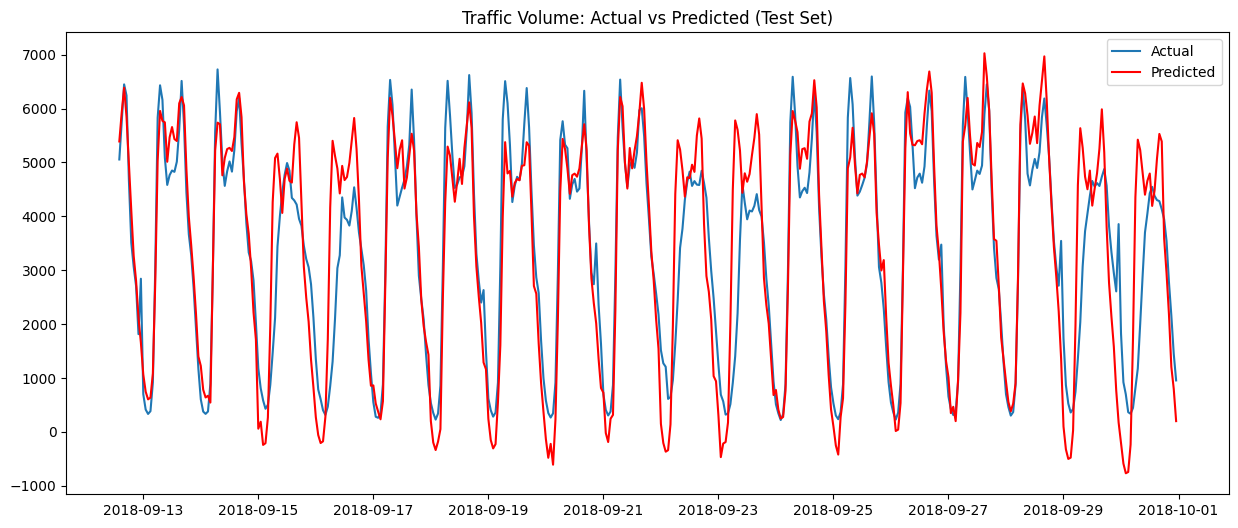

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# First, prepare the exogenous variables
# Convert categorical variables to numeric
df_subset['hour'] = df_subset.index.hour
df_subset['day_of_week'] = df_subset.index.dayofweek
df_subset['is_weekend'] = df_subset['day_of_week'].isin([5, 6]).astype(int)

# Create dummy variables for weather_main
weather_dummies = pd.get_dummies(df_subset['weather_main'], prefix='weather')

# Ensure all numeric columns are float type
numeric_columns = ['temp', 'rain_1h', 'clouds_all', 'traffic_volume']
for col in numeric_columns:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

# Combine all features
features_df = pd.concat([
    df_subset[['rain_1h', 'clouds_all', 'is_weekend', 'hour','day_of_week']],
    weather_dummies
], axis=1)

# Convert all features to float type
features_df = features_df.astype(float)

# Split the data into train and test sets
train_size = int(len(df_subset) * 0.8)
train_data = df_subset['traffic_volume'][:train_size]
test_data = df_subset['traffic_volume'][train_size:]
train_exog = features_df[:train_size]
test_exog = features_df[train_size:]

# Verify data types
print("Training data dtype:", train_data.dtype)
print("Exogenous features dtypes:")
print(train_exog.dtypes)

# Fit SARIMAX model
model = SARIMAX(train_data,
                exog=train_exog,
                order=(1, 0, 1),           # non-seasonal part (p,d,q)
                seasonal_order=(1, 0, 1, 24), # seasonal part (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print model summary
print(results.summary())

# Make predictions
predictions = results.get_forecast(steps=len(test_data), 
                                 exog=test_exog)
predicted_mean = predictions.predicted_mean

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test_data, predicted_mean))
mae = mean_absolute_error(test_data, predicted_mean)
mape = np.mean(np.abs((test_data - predicted_mean) / test_data)) * 100

print(f'\nError Metrics:')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='r')
plt.title('Traffic Volume: Actual vs Predicted (Test Set)')
plt.legend()
plt.show()

Based on the plot and results, I notice a few areas where we can improve the model:
1. The model is predicting negative traffic values, which isn't realistic
2. The predictions seem to lag behind actual values slightly
3. We can try different SARIMA parameters to better capture the patterns

In [23]:
if 1==0:
    # 1. First, let's try different SARIMA parameters using a grid search
    # We'll try a few different combinations of parameters

    import itertools

    # Define the parameter grid
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(range(0, 2), range(0, 2), range(0, 2)))]

    # Perform grid search
    best_aic = float('inf')
    best_params = None
    best_seasonal_params = None

    print("Finding best parameters...")
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train_data,
                            exog=train_exog,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
                results = model.fit()
                
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = param_seasonal
                    print(f'New best parameters found - ARIMA{param}x{param_seasonal} - AIC: {results.aic}')
            except:
                continue

    print(f'\nBest parameters found:')
    print(f'ARIMA{best_params}x{best_seasonal_params}')

    # 2. Fit the model with the best parameters
    final_model = SARIMAX(train_data,
                        exog=train_exog,
                        order=best_params,
                        seasonal_order=best_seasonal_params,
                        enforce_stationarity=False,
                        enforce_invertibility=False)

    final_results = final_model.fit()

    # Make predictions
    predictions = final_results.get_forecast(steps=len(test_data), 
                                        exog=test_exog)
    predicted_mean = predictions.predicted_mean

    # Force predictions to be non-negative
    predicted_mean = np.maximum(predicted_mean, 0)

    # Calculate error metrics
    rmse = np.sqrt(mean_squared_error(test_data, predicted_mean))
    mae = mean_absolute_error(test_data, predicted_mean)
    mape = np.mean(np.abs((test_data - predicted_mean) / test_data)) * 100

    print(f'\nError Metrics:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')

    # Plot results with confidence intervals
    plt.figure(figsize=(15, 6))
    plt.plot(test_data.index, test_data, label='Actual')
    plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='r')

    # Add confidence intervals
    conf_int = predictions.conf_int()
    plt.fill_between(conf_int.index,
                    np.maximum(conf_int.iloc[:, 0], 0),
                    conf_int.iloc[:, 1],
                    color='r', alpha=.1)

    plt.title('Traffic Volume: Actual vs Predicted (Test Set)')
    plt.legend()
    plt.show()

    # Feature importance analysis
    print("\nFeature Coefficients:")
    for idx, coef in enumerate(final_results.params[5:]):  # Skip the SARIMA parameters
        print(f"{train_exog.columns[idx]}: {coef:.4f}")

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20321D+00    |proj g|=  1.38235D-01


 This problem is unconstrained.



At iterate    5    f=  7.09167D+00    |proj g|=  2.94418D-01

At iterate   10    f=  7.08071D+00    |proj g|=  3.71282D-02

At iterate   15    f=  7.08062D+00    |proj g|=  1.74897D-02

At iterate   20    f=  7.08050D+00    |proj g|=  6.68843D-03

At iterate   25    f=  7.08050D+00    |proj g|=  2.18927D-03

At iterate   30    f=  7.08049D+00    |proj g|=  5.09765D-03

At iterate   35    f=  7.07994D+00    |proj g|=  5.91553D-02

At iterate   40    f=  7.07054D+00    |proj g|=  1.98600D-01

At iterate   45    f=  7.02587D+00    |proj g|=  1.44665D-01


/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.01926D+00    |proj g|=  4.32539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     50     62      1     0     0   4.325D-03   7.019D+00
  F =   7.0192623363832700     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

Error Metrics:
RMSE: 833.35
MAE: 541.94
MAPE: 32.60%


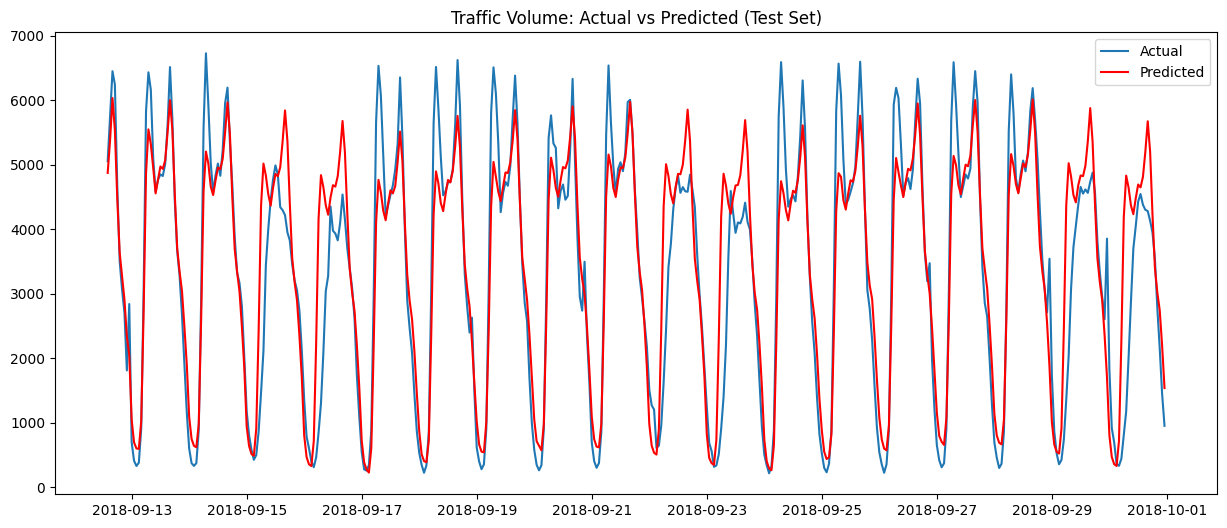

In [24]:
# 1. Normalize/Scale the features to handle large differences in magnitude
from sklearn.preprocessing import StandardScaler

# Create scaled features
scaler = StandardScaler()
scaled_features = ['rain_1h', 'clouds_all', 'hour', 'day_of_week']
features_df[scaled_features] = scaler.fit_transform(features_df[scaled_features])

# 2. Add cyclical encoding for hour and day_of_week
features_df['hour_sin'] = np.sin(2 * np.pi * features_df['hour']/24)
features_df['hour_cos'] = np.cos(2 * np.pi * features_df['hour']/24)
features_df['day_sin'] = np.sin(2 * np.pi * features_df['day_of_week']/7)
features_df['day_cos'] = np.cos(2 * np.pi * features_df['day_of_week']/7)

# Drop original hour and day_of_week
features_df = features_df.drop(['hour', 'day_of_week'], axis=1)

# Split the data again with our new features
train_size = int(len(df_subset) * 0.8)
train_data = df_subset['traffic_volume'][:train_size]
test_data = df_subset['traffic_volume'][train_size:]
train_exog = features_df[:train_size]
test_exog = features_df[train_size:]

# Fit SARIMAX model with adjusted parameters
model = SARIMAX(train_data,
                exog=train_exog,
                order=(2, 1, 2),           # increased order and added differencing
                seasonal_order=(1, 1, 1, 24), # added seasonal differencing
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Make predictions
predictions = results.get_forecast(steps=len(test_data), 
                                 exog=test_exog)
predicted_mean = predictions.predicted_mean

# Force predictions to be non-negative
predicted_mean = np.maximum(predicted_mean, 0)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test_data, predicted_mean))
mae = mean_absolute_error(test_data, predicted_mean)
mape = np.mean(np.abs((test_data - predicted_mean) / test_data)) * 100

print(f'\nError Metrics:')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='r')
plt.title('Traffic Volume: Actual vs Predicted (Test Set)')
plt.legend()
plt.show()

# Modeling

# Model Evaluation